# Deep learning

Playing around with deep learning using TensorFlow

Try to train a model to differentiate between circles and squares


## Data

I made 30 images of circles and 30 images of squares in Inkscape, which I saved as `.svg` files.  It was too much bother to use `cairo` to load these files, so I used `imagemagick` to convert them to `.png`.

The first step is to load these files

In [1]:
import glob
import os
import re

from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


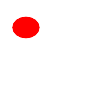

In [6]:
# load one image
file = "shapes/circle1.png"
img = Image.open(file)
img

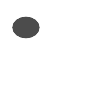

In [3]:
# convert to greyscale
img = ImageOps.grayscale(img)
img

In [4]:
# convert to numpy array
np.array(img)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [5]:
# function to load data
def load_img(filename):
    img = Image.open(file)
    img = ImageOps.grayscale(img)
    return np.array(img)


# load data in dataframe
df = pd.DataFrame({'filename' : glob.glob("shapes/*png")})

df['num'] = df['filename'].map(lambda x: int(re.search("\\d+", x).group(0)))

df['shape'] = df['filename'].map(lambda x: 'circle' if 'circle' in x else 'square')

df['pixels'] = df['filename'].map(load_img)

df

,filename,num,shape,pixels
0,shapes/square3.png,3,square,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
1,shapes/circle19.png,19,circle,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
2,shapes/circle25.png,25,circle,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
3,shapes/circle24.png,24,circle,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
4,shapes/circle30.png,30,circle,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
5,shapes/circle18.png,18,circle,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
6,shapes/square2.png,2,square,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
7,shapes/circle26.png,26,circle,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
8,shapes/circle27.png,27,circle,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
9,shapes/square1.png,1,square,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
